In [ ]:
import os

ModuleNotFoundError: No module named 'kaggle'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

In [3]:
raw_data = pd.read_csv('2019.csv')

In [4]:
raw_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
raw_data.isna().sum().sum()

np.int64(0)

In [6]:
cols = raw_data.columns.tolist()
numerical_cols = [cols[0]] + cols[2:] 

mm_data = raw_data.copy()
for col in numerical_cols:
    mm_data[col] = (raw_data[col] - raw_data[col].min()) / (raw_data[col].max() - raw_data[col].min())
std_data = raw_data.copy()
for col in numerical_cols:
    std_data[col] = (raw_data[col] - raw_data[col].mean()) / raw_data[col].std()

In [7]:
std_data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,9.109522e-17,-6.376666e-16,-1.366428e-16,-1.366428e-16,-3.188333e-16,-2.732857e-16,1.836138e-16,-1.138690e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.715458e+00,-2.294538e+00,-2.272016e+00,-4.040270e+00,-2.995340e+00,-2.739702e+00,-1.940552e+00,-1.169929e+00
25%,-8.577292e-01,-7.749355e-01,-7.590498e-01,-5.115926e-01,-7.330690e-01,-5.902074e-01,-7.988725e-01,-6.727736e-01
50%,0.000000e+00,-2.479172e-02,1.376858e-01,2.095177e-01,2.633213e-01,1.704905e-01,-7.712138e-02,-2.655293e-01
75%,8.577292e-01,6.984008e-01,8.216898e-01,8.144816e-01,6.463895e-01,8.003344e-01,6.656261e-01,3.241817e-01
max,1.715458e+00,2.121877e+00,1.955003e+00,1.387693e+00,1.717122e+00,1.663971e+00,4.001429e+00,3.621803e+00


In [8]:
mm_data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.500000,0.519548,0.537498,0.744344,0.635621,0.622140,0.326583,0.244156
std,0.291467,0.226428,0.236573,0.184231,0.212203,0.227083,0.168294,0.208693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.344081,0.357928,0.650092,0.480061,0.488114,0.192138,0.103753
50%,0.500000,0.513934,0.570071,0.782943,0.691499,0.660856,0.313604,0.188742
75%,0.750000,0.677685,0.731888,0.894397,0.772787,0.803883,0.438604,0.311810
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0.98, 'Standardized Data - Scatter Matrix')

<Figure size 1200x1000 with 0 Axes>

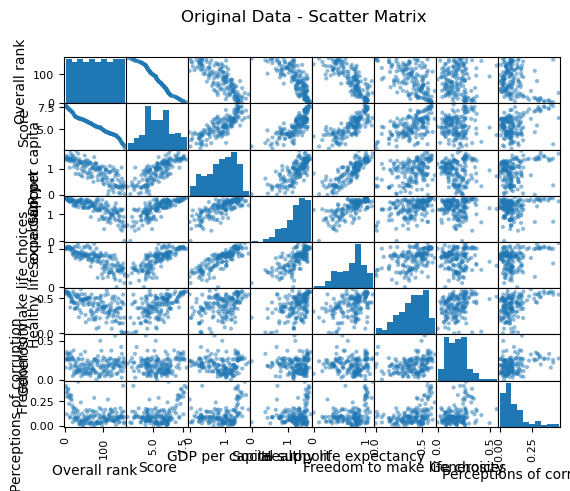

<Figure size 1200x1000 with 0 Axes>

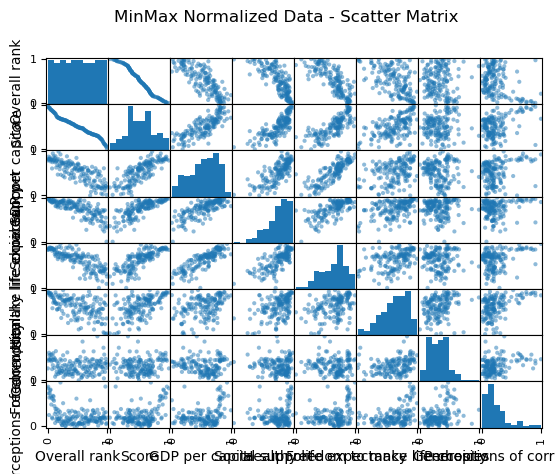

<Figure size 1200x1000 with 0 Axes>

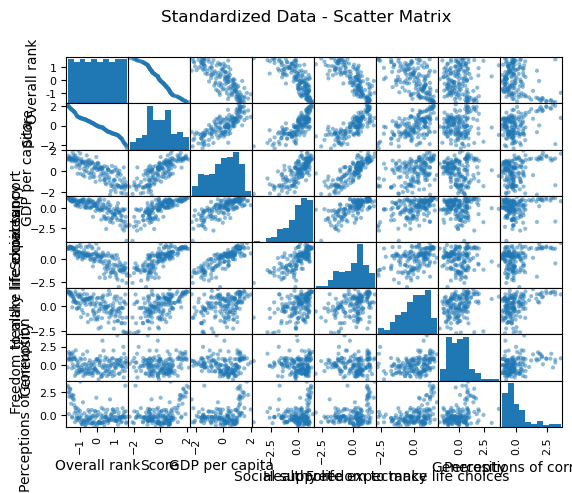

In [ ]:
# Create scatter matrix for original data
pd.plotting.scatter_matrix(raw_data[numerical_cols])
plt.suptitle('Original Data - Scatter Matrix')

# Create scatter matrix for minmax normalized data
pd.plotting.scatter_matrix(mm_data[numerical_cols])
plt.suptitle('MinMax Normalized Data - Scatter Matrix')

# Create scatter matrix for standardized data
pd.plotting.scatter_matrix(std_data[numerical_cols])
plt.suptitle('Standardized Data - Scatter Matrix')

Captions: *********************************

In [14]:
from sklearn.cluster import KMeans

features = ['Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(std_data[features])

raw_data['Cluster'] = clusters

KeyError: "['Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Dystopia Residual'] not in index"